In [1]:
import sys
sys.path.append('../')
import latexStrings as ls
import numpy as np
import matplotlib.pyplot as plt
from math import *
from IPython.display import Latex
import odesolver

# Ejercicio 4 

Dado el PVI:

\begin{equation} \label{eq:4}
y'= 5y  -3y^2 \qquad y(0) = 1/2 \qquad t\in [0,20] 
\end{equation}

Buscamos las soluciones de equilibrio y* (raíces de nuestra función f):

$$y'=5y  -3y^2=0 \Rightarrow (5-3y)y=0 \Rightarrow y_1^*=0,y_2^*=5/3$$

Como podemos observar en la siguiente grafica:

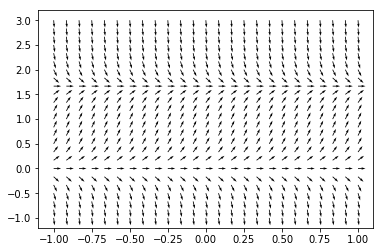

In [2]:
f = lambda t, y : 5*y-3*y*y

T = np.linspace(-1,1,25)
Y = np.linspace(-1,3,25)

F = np.array([[f(t,y) for t in T] for y in Y])
F = np.arctan(F)
U = np.cos(F)
V = np.sin(F)

plt.quiver(T,Y,U,V)
plt.show()

El punto y_1^* es un repulsor mientras que el punto y_2^* es un atractor. Esto se debe a que:

----Justificacion----

Ahora apliquemos el metodo de Euler implicito con paso $h=0.5$ a nuestra función

In [3]:
f = lambda t, y : 5*y-3*y*y
I = (0, 20)
y0 = 0.5


T, W = odesolver.solve(f,y0,I,40,method="Implicit Euler")
Latex('Obtenemos una aproximación para y(20): ' + '$w_{40}$ = ' + str(W[0,40]))

<IPython.core.display.Latex object>

Con lo que podemos observar que el método de Euler implícito con $h=1/2$ converge hacia $y_2^*=5/3$

Ahora utilizemos el método de Euler explícito, con pasos $F(w;h)=w_{i+1}=w_i+h[5w_i-3w_i^2]$ y pasos $h \in \{1/6,1/5,1/4,1/2\}$

In [4]:
T2, W2 = odesolver.solve(f,y0,I,120,method="Explicit euler")
T3, W3 = odesolver.solve(f,y0,I,100,method="Explicit Euler")
T4, W4 = odesolver.solve(f,y0,I,80,method="Explicit Euler")
T5, W5 = odesolver.solve(f,y0,I,40,method="Explicit Euler")

Latex('Obtenemos aproximaciónes para y(20) de:   $\quad w_{120}$='+ str(W2[0,120])+'$,\quad w_{100}$='+ str(W3[0,100])+'$,\quad w_{80}$='+ str(W4[0,80])+'$,\quad w_{40}$='+ str(W5[0,40])+'$\quad$ respectivamente. ')

<IPython.core.display.Latex object>

El método converge a $w_*=5/3$ con  h ∈ {1/6,1/5,1/4} pues 
$$\vert \frac{\partial F(w;h)}{\partial w}\vert |_{w=w^*}=|1+h[5-6w]|_{w=w^*}|=|1+h[5-6w]|_{w=5/3}|=|1+h[-5]|<1\Leftrightarrow -1<1-5h<1\Leftrightarrow -2<-5h<0\Leftrightarrow 0<h<2/5$$ 
y $0<1/6<1/5<1/4<2/5$ lo que implica que $w_*=5/3$ es aractor para estos valores de h.

Pero 
$$|\frac{\partial F(w;h)}{\partial w}||_{w=w^*}|=|1+h[5-6w]|_{w=w^*}|=|1+h[5-6w]|_{w=5/3}|=|1+h[-5]|>1\Leftrightarrow 1-5h<-1 \quad ó \quad 1-5h>1\Leftrightarrow h<0 \quad ó \quad h>2/5$$ 
y $1/2>2/5$ lo que implica que $w_*=5/2$ es un repulsor para h=1/2

Por lo tanto el método funciona bien para h<2/5

Finalmente apliquemos el método RK2/3 adaptativo con tolerancia relativa tol=1/10 y tamaño del paso inicial h=0.5

In [5]:
T6, W6 = odesolver.solve(f,y0,I,method="RK23",tol=0.1,initialStep=0.5)
Latex('Obtenemos aproximaciónes para y(20) de:  w' + str(len(W6[0])-1)+'='+ str(W6[0,len(W6[0])-1]))

<IPython.core.display.Latex object>

Por otro lado si tomamos tol=1/100 y tamaño del paso inicial h=0.5

In [6]:
T7, W7 = odesolver.solve(f,y0,I,method="RK23",tol=0.01,initialStep=0.5)
Latex('Obtenemos aproximaciónes para y(20) de:  w' + str(len(W7[0])-1)+'='+ str(W7[0,len(W7[0])-1]))

<IPython.core.display.Latex object>

Para el método RK2/3 sin extrapolación se utilizan las aproximaciones que te da el RK2 (Trapecio Explícito). Por lo tanto en este caso queremos ver para que valores de h el método RK2/3 sin extrapolación (RK2) es STIFF en $w^*=\frac{5}{3}$.

--- Verificar puntos stiff de RK2/3 (trapecio explicito) --